# convolutional neural network (CNN)

## Intuitive description

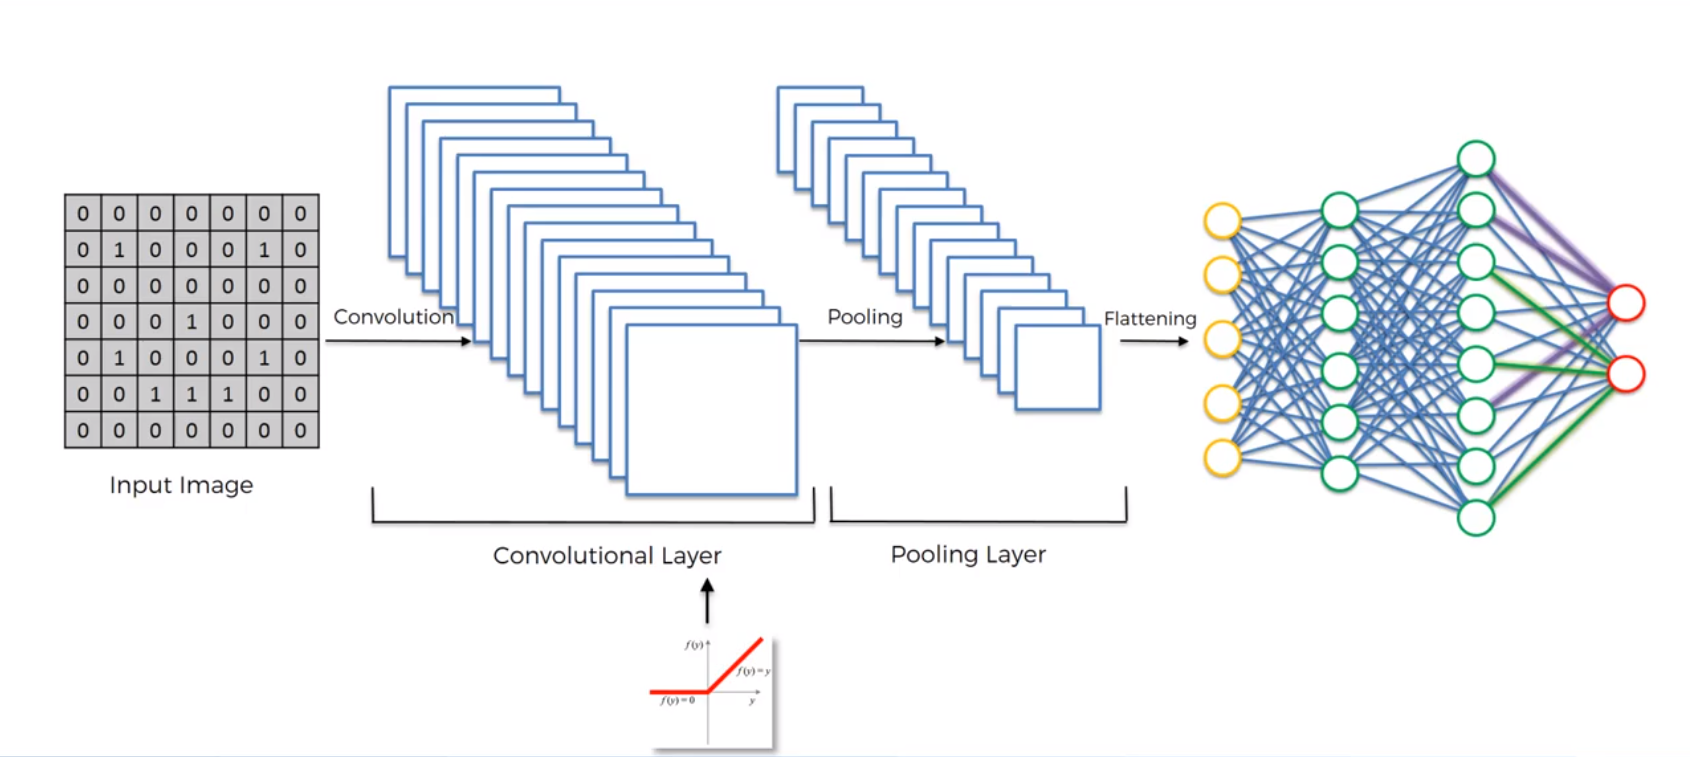

figure 1. whole schematic of CNN. source: superdatascience.com


In [30]:
from IPython.display import Image, display_jpeg, display_png
display_png(Image('cnn1.PNG'))
print('figure 1. whole schematic of CNN. source: superdatascience.com')

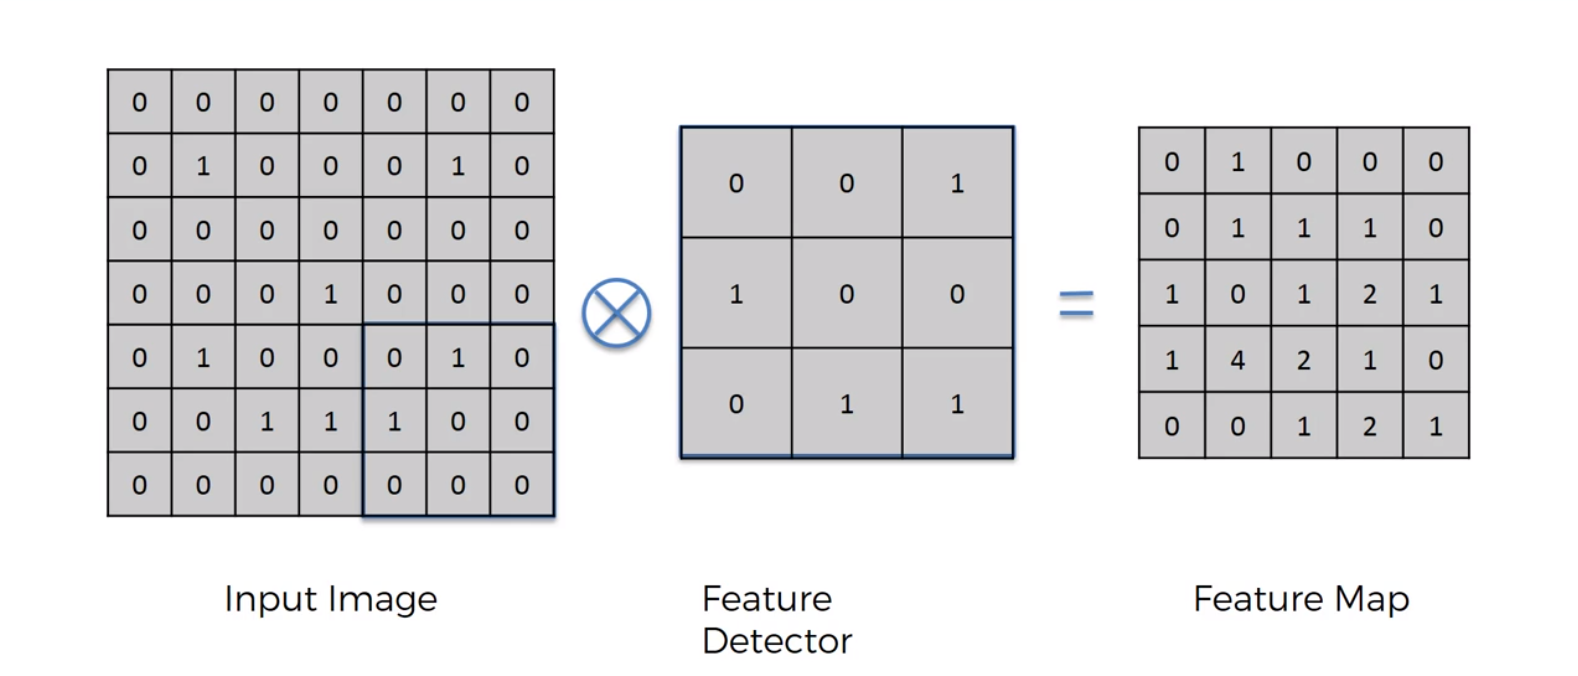

figure 2. feature extraction by feature detectors. source: superdatascience.com


In [31]:
from IPython.display import Image, display_jpeg, display_png
display_png(Image('cnn2.PNG'))
print('figure 2. feature extraction by feature detectors. source: superdatascience.com')

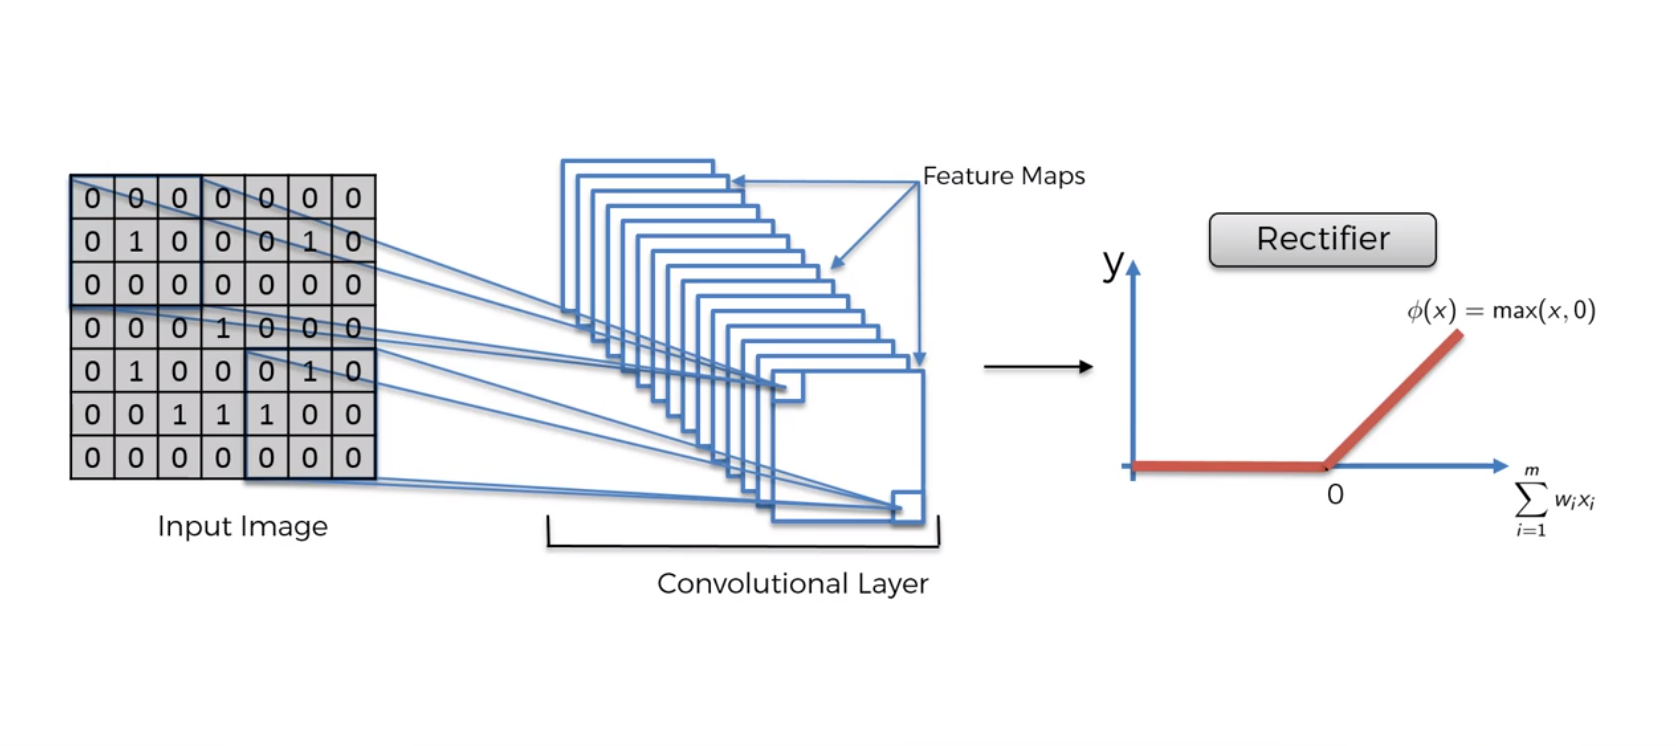

figure 3. Calculation by Rectifying Linear Unit (LeRU) to obtain non-linearlity. source: superdatascience.com


In [5]:
from IPython.display import Image, display_jpeg, display_png
display_png(Image('cnn4.PNG'))
print('figure 3. Calculation by Rectifying Linear Unit (LeRU) to obtain non-linearlity. source: superdatascience.com')

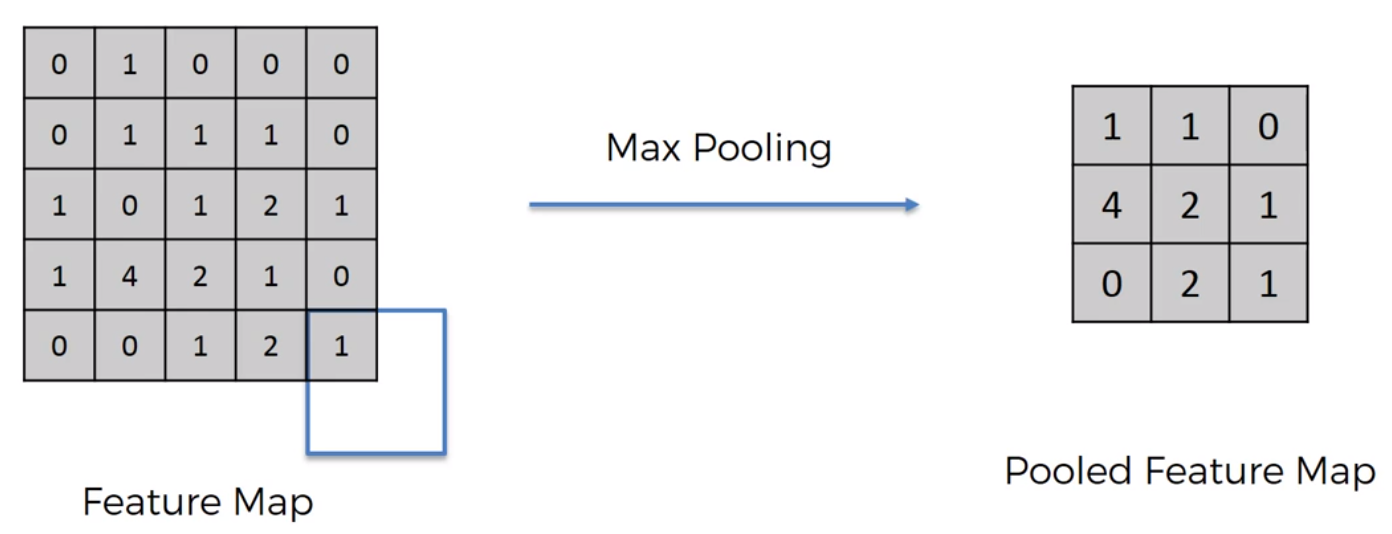

figure 4. Max pooling. source: superdatascience.com


In [32]:
from IPython.display import Image, display_jpeg, display_png
display_png(Image('cnn5.PNG'))
print('figure 4. Max pooling. source: superdatascience.com')

Convolutional layer at figure 1 includes the processes of figure 2 and 3.  
Pooling layer is necessary to reduce features (it make the computation faster) while preserving the essential features.  
At the backpropagation, both the weights of fully connected ANN and the feature detectors are updated.  

## Architecture Construction

In [33]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

#initialize the CNN
classifier = Sequential()

#1 add convolution layers
#we use tensorflow backend. filters = number of feature detectors, kernel_size = the size of feature detectors, input_shape = the size of the input variables (input pictures)
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), input_shape=(64, 64, 3), activation = 'relu'))

#2 pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

##### option: add another convolution and pooling layer for better performance. the code can run without this part. #####
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
######################################################################################################################

#3 flattening
classifier.add(Flatten())

#4 full connection
classifier.add(Dense(units=128, activation= 'relu'))
#since the output node is binary (cat or dog), we use sigmoid, not softmax
classifier.add(Dense(units=1, activation= 'sigmoid'))

#compile the CNN
#since the function corresponds to logarithmic loss (common in CNN) and we have a binary outcome, we use binary_cross_entropy instead of categorical_corss_entropy
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])



## Data Import and  train and test the model

In [9]:
# code reference: https://keras.io/preprocessing/image/

from keras.preprocessing.image import ImageDataGenerator

#image augumentation preparation for training dataset
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
print(train_datagen)

#image augumentation for test dataset, which is also normalizing the data
test_datagen = ImageDataGenerator(rescale=1./255)

#create the training set
#target_size should be same as the input shape defined at classifier.add.
#this function also resized the training dataset
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

#create the test set
#this function also resized the test dataset
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

#fit (train) the parameters (feature detector and the weights at the ANN) with the training set and test the trained model with the test set
# this process can take a few hours depending on PC performance!!!
classifier.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=1,
        validation_data=test_set,
        validation_steps=2000)

#for more improvement, you can revise number of epochs, layers, feature detectors, input_shape

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
8000/8000 [==============================] - 2460s 308ms/step - loss: 0.3396 - acc: 0.8405 - val_loss: 0.6199 - val_acc: 0.7905


From the test result,  
acc (the accuracy on the training dataset) was 0.8405.  
val_acc (the accuracy on the test dataset) 0.7905. This is more interesting number to evaluate the model.  
the difference between acc and val_acc indicates the degree of overfitting. 0.8405 and 0.7905 are not very different, and so we can say overfitting is not occuring.


## Prediction for single image file input

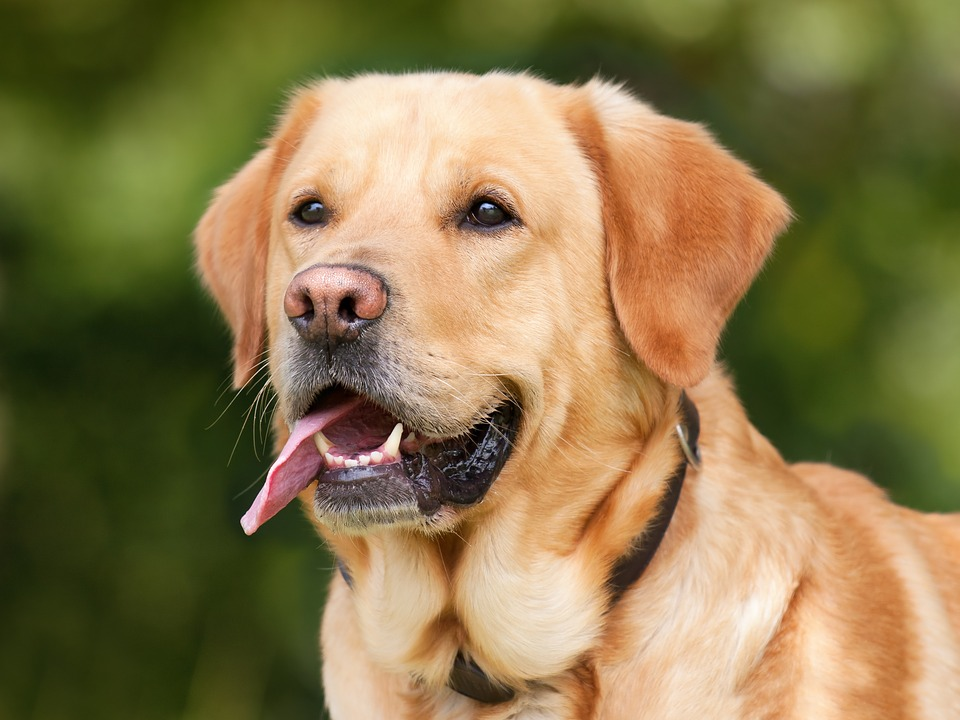

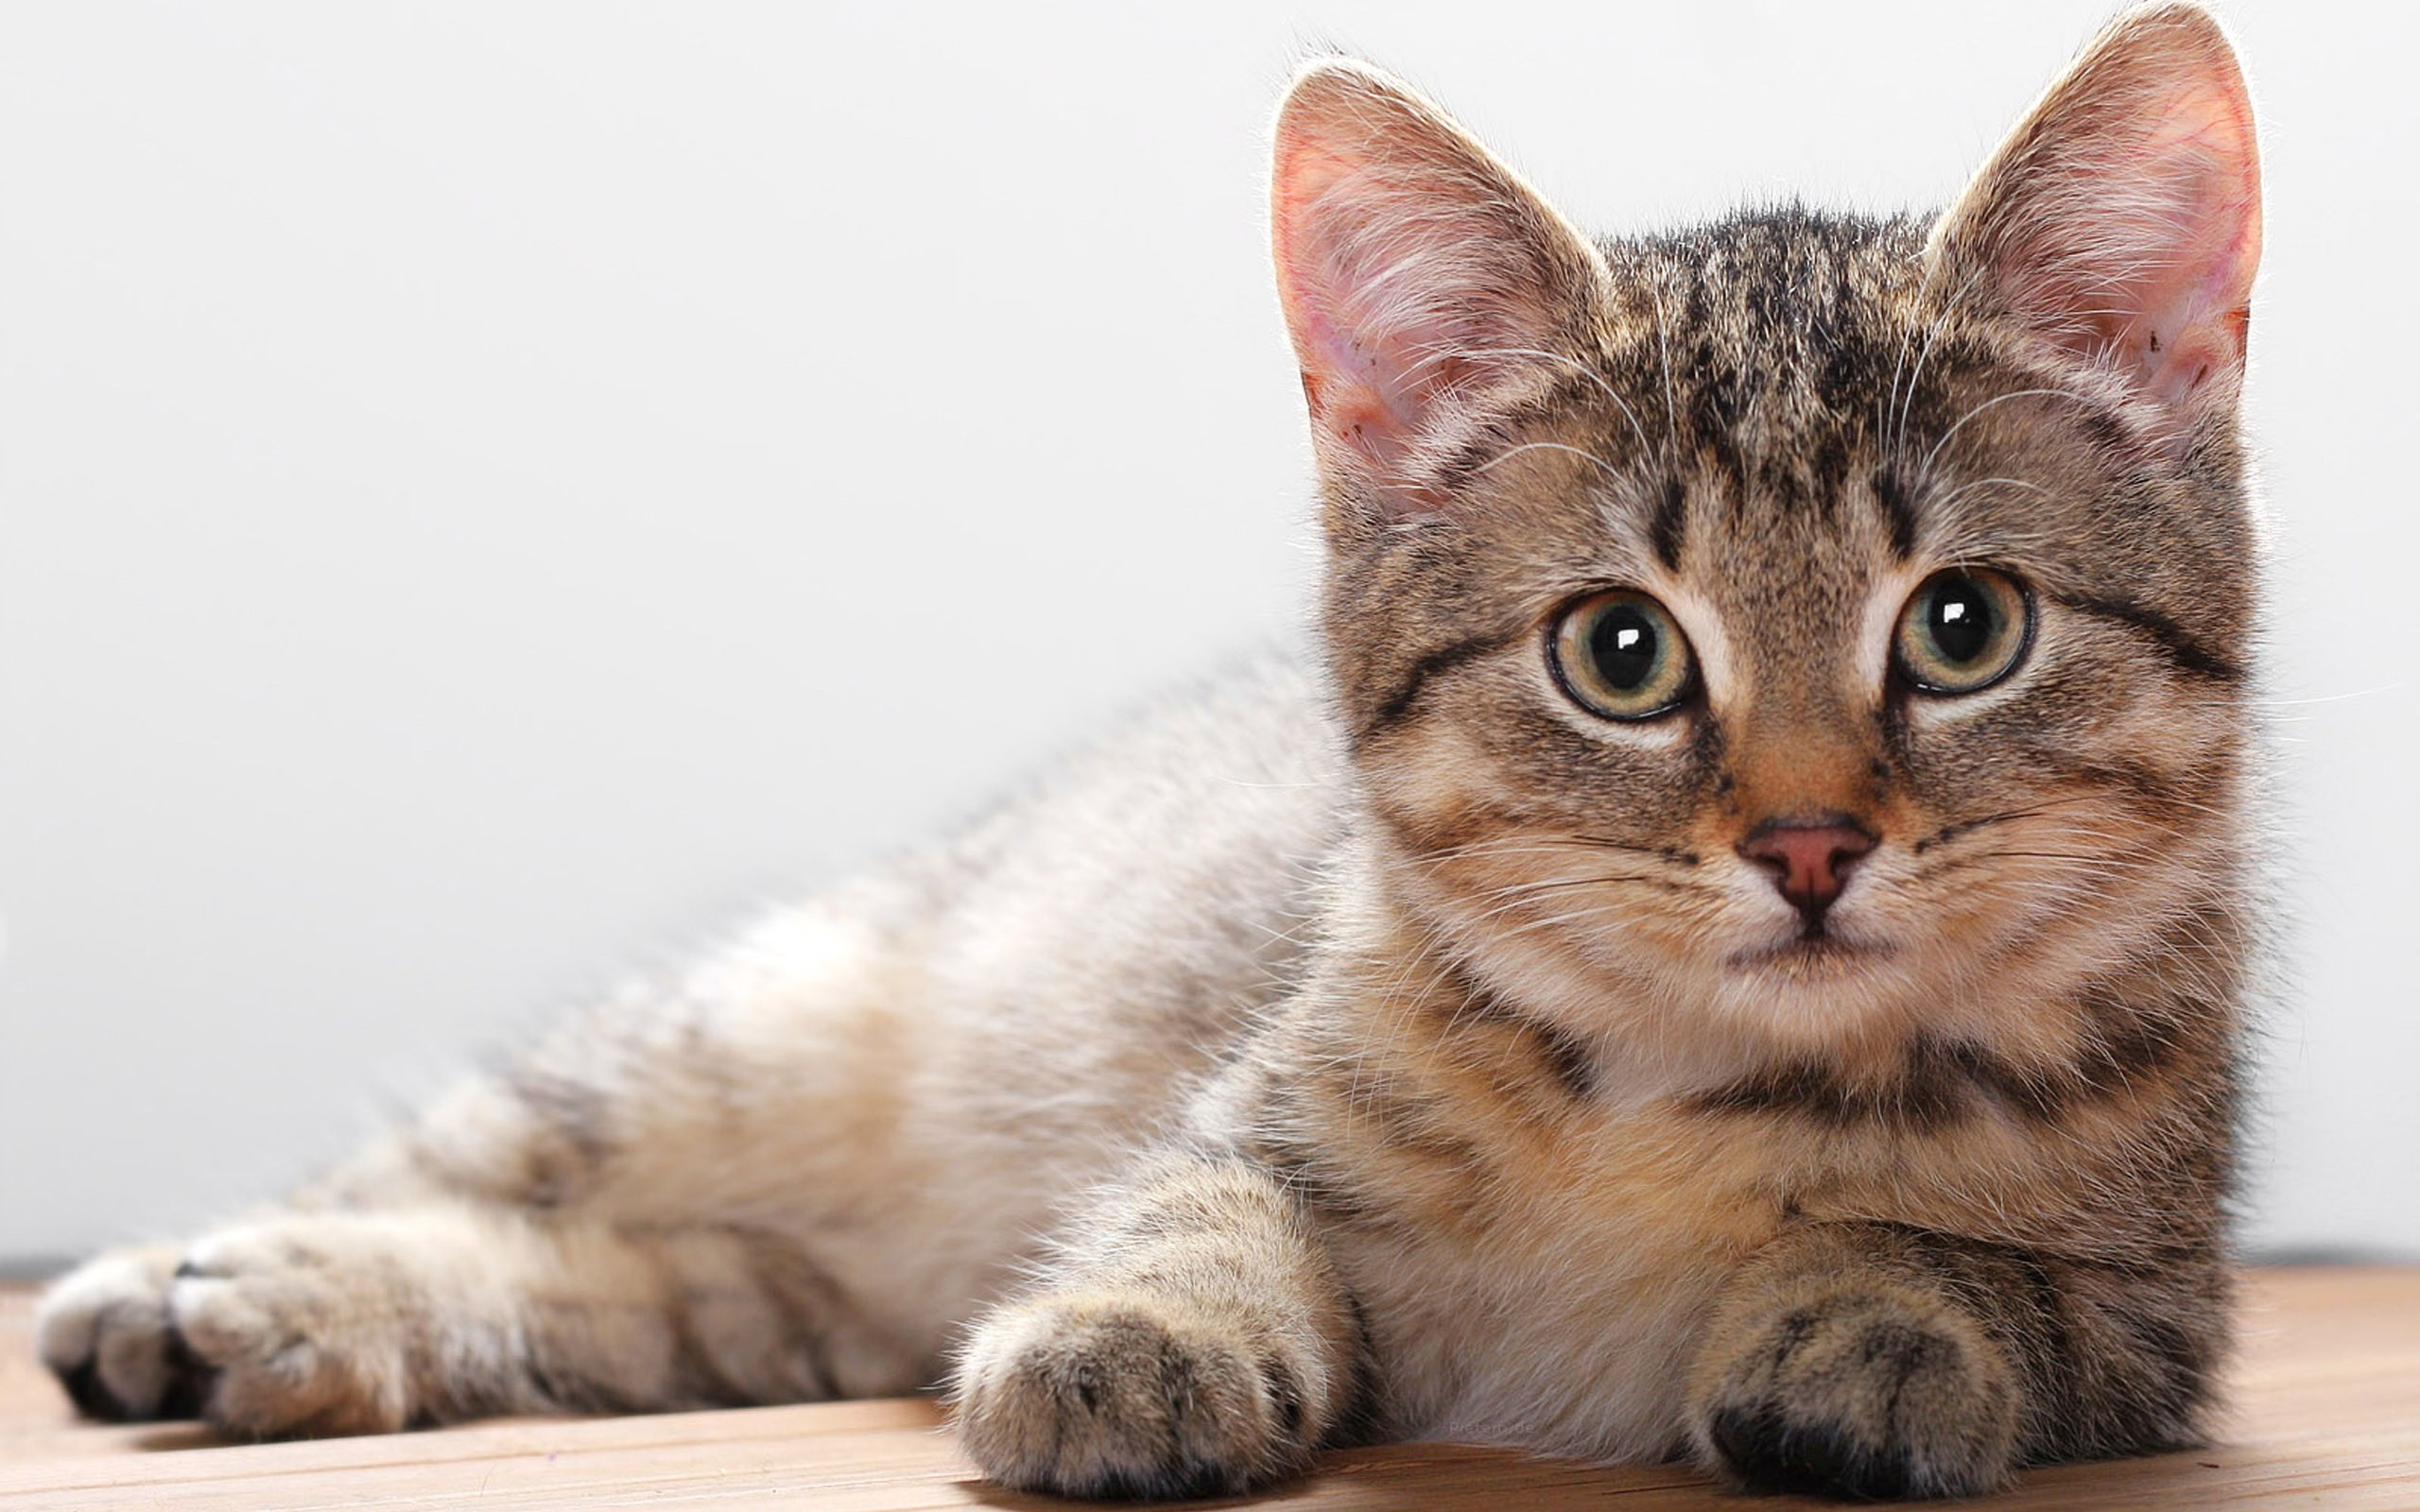

In [35]:
from IPython.display import Image, display_jpeg, display_png

display_jpeg(Image('dataset/single_prediction/cat_or_dog_1.jpg'))
display_jpeg(Image('dataset/single_prediction/cat_or_dog_2.jpg'))

path = 'dataset/single_prediction/cat_or_dog_1.jpg'
# path = 'dataset/single_prediction/cat_or_dog_2.jpg'

In [36]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(path=path, target_size = (64,64))

#maek the image 3 arrays (black&white to color)
test_image_3d = image.img_to_array(test_image)
#add another dimenstion for batch size
test_image_3d = np.expand_dims(test_image_3d, axis = 0)
#run prediction
result = classifier.predict(test_image_3d)
print("result ", result)
#get the labels to each output variable
labels = training_set.class_indices
print("labels: ",labels)
labels = {v:k for k, v in labels.items()}
if result[0][0] == 1:
#    dog
    prediction = labels[1]
else:
#    cat
    prediction = labels[0]
print("prediction ", prediction)

In my experiment, the model regarded  
path = 'dataset/single_prediction/cat_or_dog_1.jpg' as a dog, which is correct.  
path = 'dataset/single_prediction/cat_or_dog_2.jpg' as a dog, which is wrong.  
It is not very surprising that the model classified wrongly because the accuracy on the test set was around 0.75, which means the model is wrong at around 25%.